In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib

label_dict_Z = {
    "0": r"$Z_{L_1}$",
    "1": r"$Z_{L_2}$",
    "2": r"$Z_{L_3}$",
    "3": r"$Z_{L_4}$",
    "4": r"$Z_{L_5}$",
    "5": r"$Z_{L_6}$",
}
label_dict_X = {
    "0": r"$X_{L_1}$",
    "1": r"$X_{L_2}$",
    "2": r"$X_{L_3}$",
}
label_colors_1 = list(matplotlib.colors.TABLEAU_COLORS.keys())
label_colors_2 = ["tab:olive", "tab:gray", "tab:cyan"]

# Fig4.A

In [22]:
fig4a_data = scipy.io.loadmat("fig4a.mat", simplify_cells=True)
ts = fig4a_data["ts"]
disorders = fig4a_data["disorders"]
Zs_exp_avg = fig4a_data["Zs_exp_avg"]
Zs_exp_err = fig4a_data["Zs_exp_err"]
freqs = fig4a_data["freqs"]
Zs_exp_fft = fig4a_data["Zs_exp_fft"]

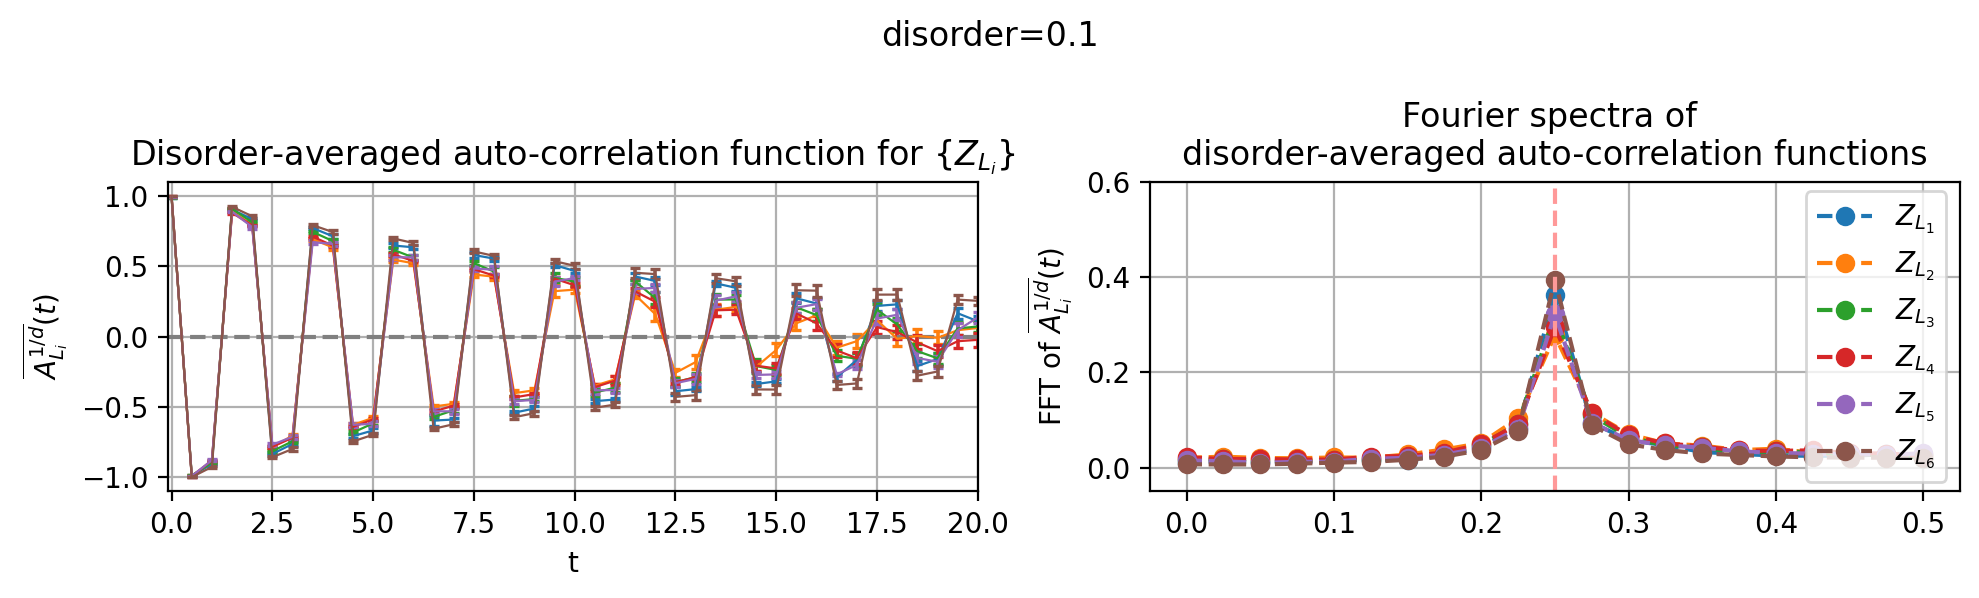

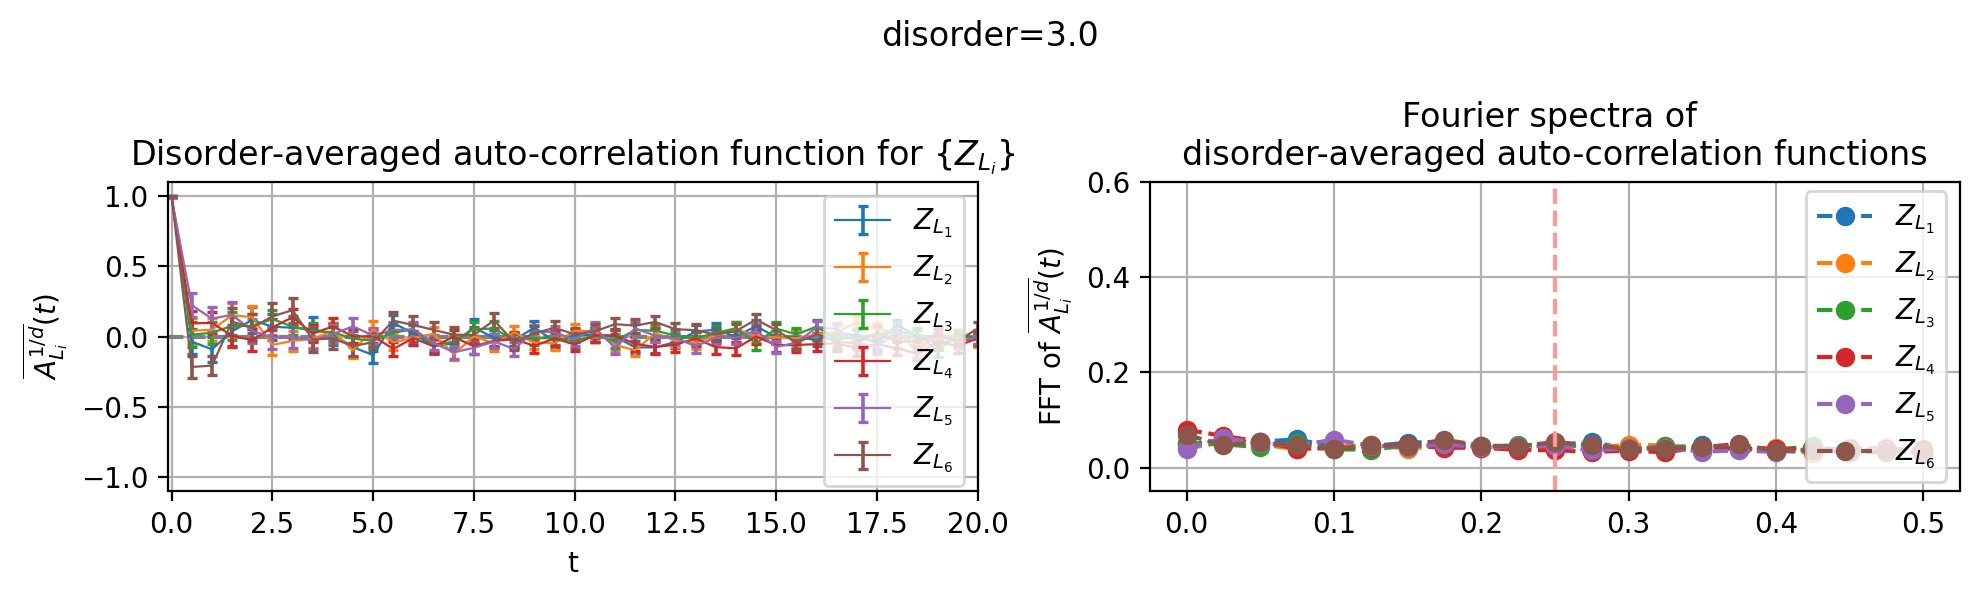

In [23]:
for disorder in [0.1, 3.0]:
    dis_i = disorders.tolist().index(disorder)
    fig = plt.figure(figsize=(10, 3), dpi=200)
    axes = fig.subplots(nrows=1, ncols=2)
    for Zs_i in range(6):
        axes[0].errorbar(
            ts,
            Zs_exp_avg[Zs_i, dis_i],
            Zs_exp_err[Zs_i, dis_i],
            label=label_dict_Z[f"{Zs_i}"],
            color=label_colors_1[Zs_i],
            elinewidth=1.3,
            linewidth=0.8,
            capsize=1.8,
            capthick=1.2,
        )

    axes[0].axhline(y=0, ls="--", color="gray")
    axes[0].set_ylim([-1.1, 1.1])
    axes[0].set_xlim([-0.1, ts[-1]])
    axes[0].set_xlabel("t")
    axes[0].set_ylabel(r"$\overline{A^{1/d}_{L_i}}(t)$")
    axes[0].set_title("Disorder-averaged auto-correlation function for " + r"$\{Z_{L_i}\}$")
    axes[0].grid()
    if disorder == 3.0:
        axes[0].legend()

    for Zs_i in range(6):
        axes[1].plot(
            freqs,
            Zs_exp_fft[Zs_i, dis_i, :],
            "o--",
            label=label_dict_Z[f"{Zs_i}"],
            color=label_colors_1[Zs_i],
        )
    axes[1].axvline(x=0.25, ls="--", color="#ff9999")
    axes[1].set_ylim([-0.05, 0.6])
    axes[1].legend(loc="right")
    axes[1].grid()
    axes[1].set_ylabel(r"FFT of $\overline{A^{1/d}_{L_i}}(t)$")
    axes[1].set_title("Fourier spectra of \ndisorder-averaged auto-correlation functions")
    fig.suptitle(f"disorder={disorder}")
    fig.tight_layout()

# Fig4.B

In [24]:
fig4b_data = scipy.io.loadmat("fig4b.mat", simplify_cells=True)
disorders = fig4b_data["disorders"]
Zs_exp_fft = fig4b_data["Zs_exp_fft"]
Zs_sim_fft = fig4b_data["Zs_sim_fft"]
fftpeak = fig4b_data["fftpeak"]

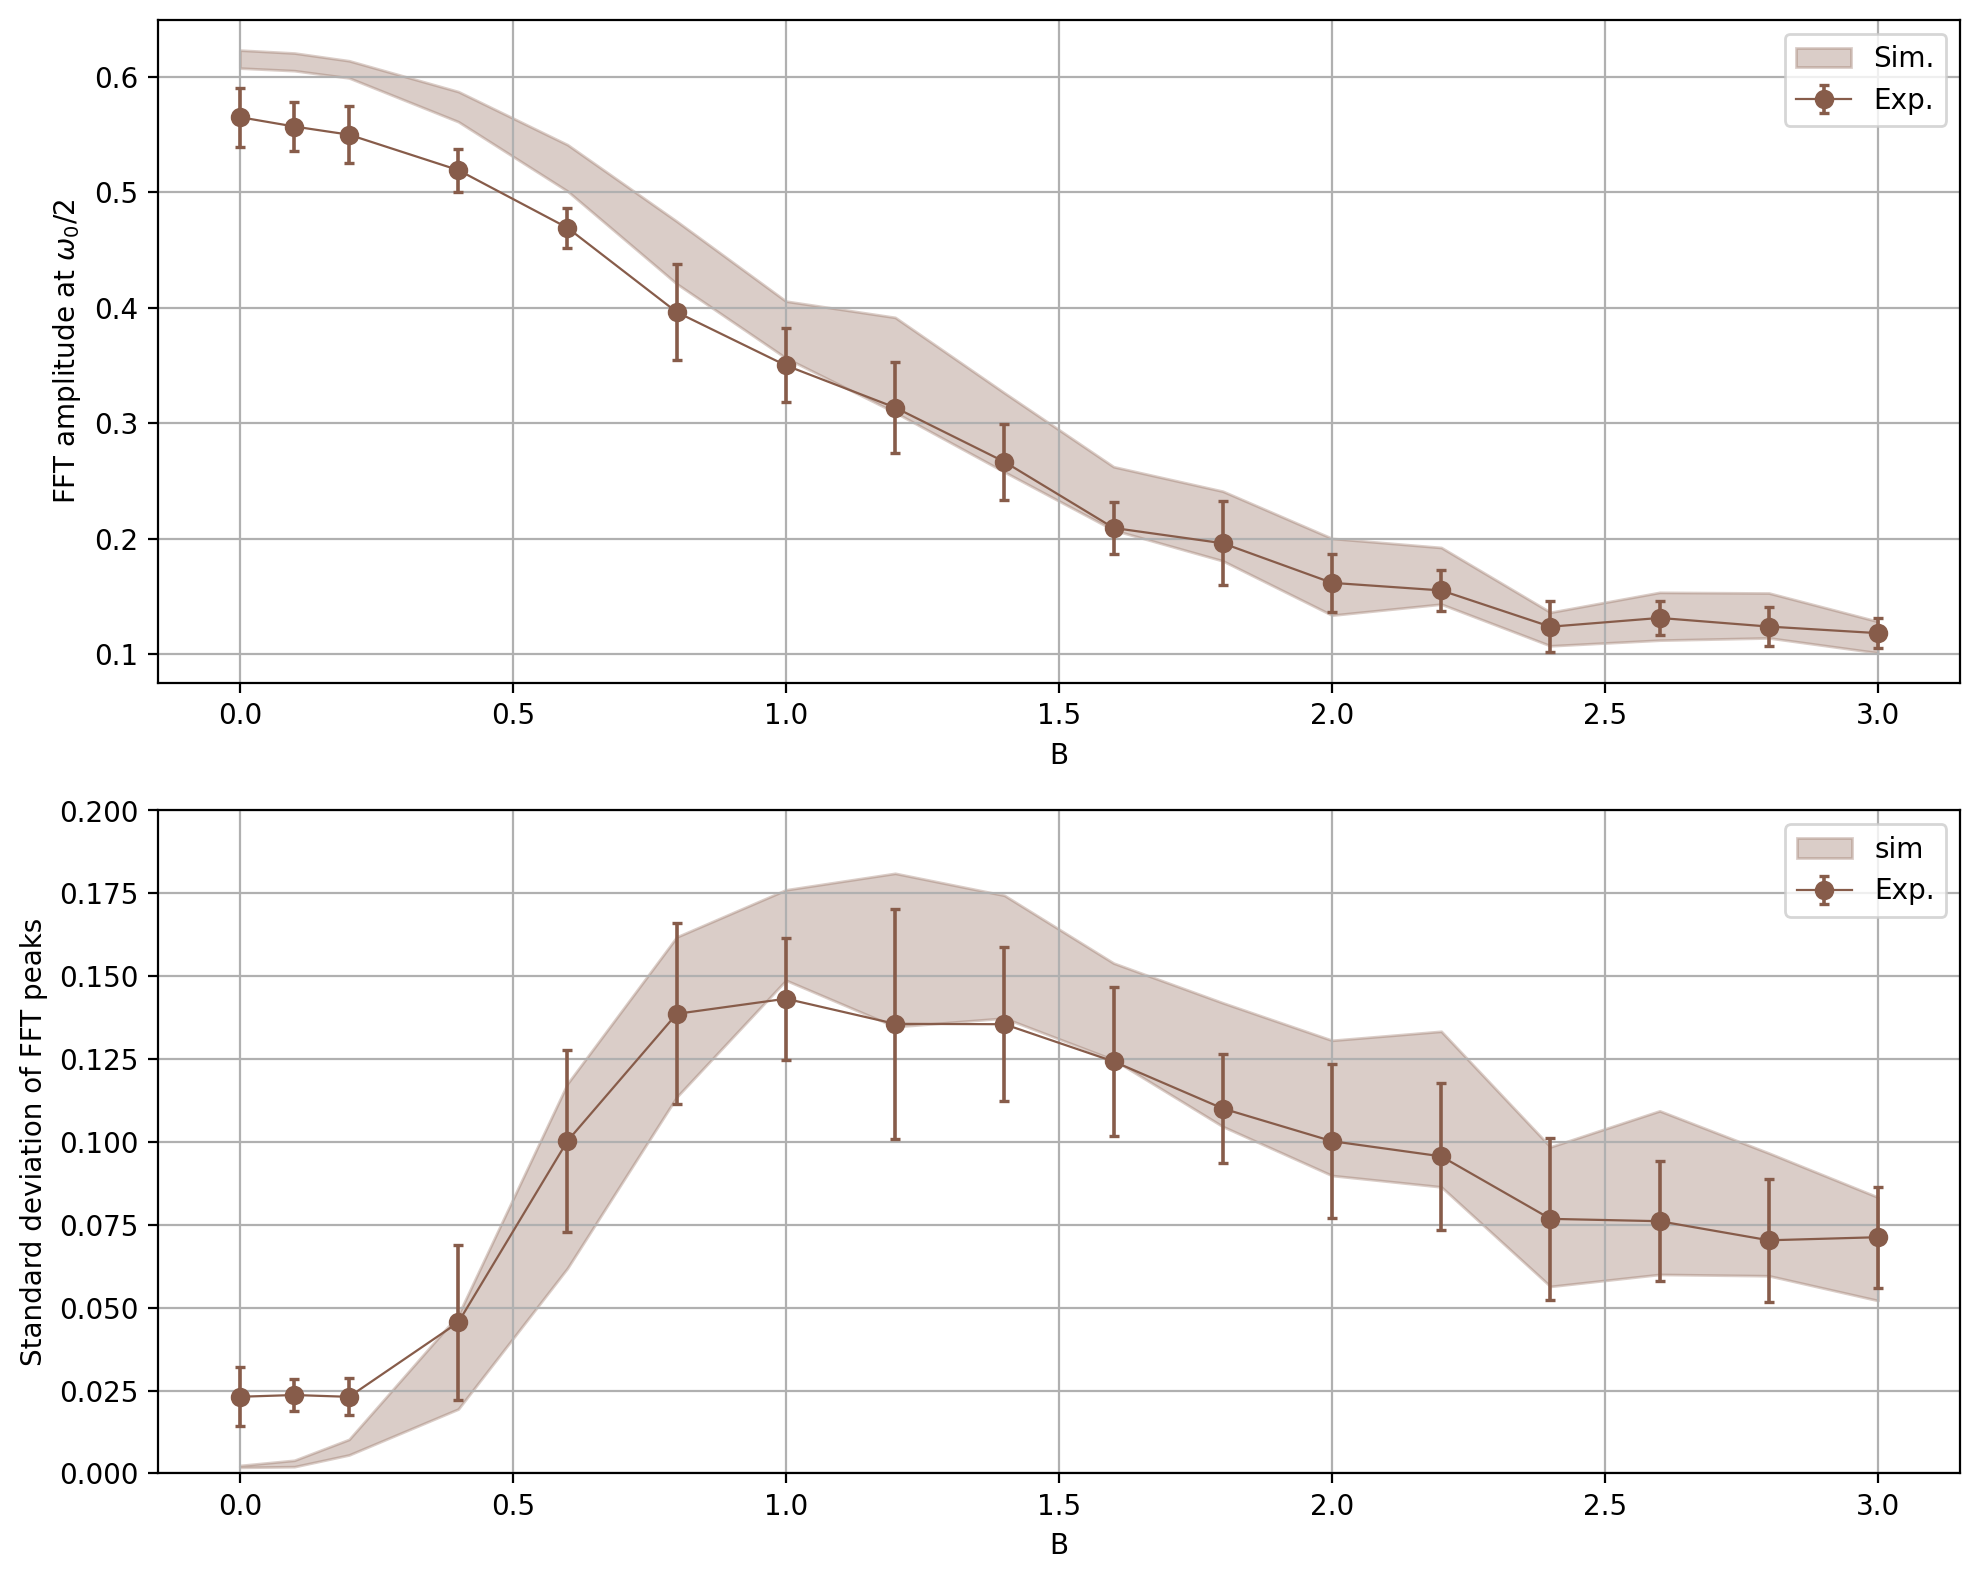

In [25]:
plt.close("all")
plt.figure(figsize=(10, 8), dpi=200)

exp_fft_peak_avg = np.average(np.average(Zs_exp_fft, axis=0), axis=0)[:, fftpeak]
exp_fft_peak_std = np.std(np.average(Zs_exp_fft, axis=0), axis=0, ddof=1)[:, fftpeak]
exp_fft_peak_flu_avg = np.average(np.std(Zs_exp_fft, axis=0, ddof=1), axis=0)[:, fftpeak]
exp_fft_peak_flu_std = np.std(np.std(Zs_exp_fft, axis=0, ddof=1), axis=0, ddof=1)[:, fftpeak]

sim_fft_peak_avg = np.average(np.average(Zs_sim_fft, axis=0), axis=0)[:, fftpeak]
sim_fft_peak_std = np.std(np.average(Zs_sim_fft, axis=0), axis=0, ddof=1)[:, fftpeak]
sim_fft_peak_flu_avg = np.average(np.std(Zs_sim_fft, axis=0, ddof=1), axis=0)[:, fftpeak]
sim_fft_peak_flu_std = np.std(np.std(Zs_sim_fft, axis=0, ddof=1), axis=0, ddof=1)[:, fftpeak]


plt.subplot(211)
plt.errorbar(
    disorders,
    exp_fft_peak_avg,
    exp_fft_peak_std,
    marker="o",
    color="#875c4a",
    elinewidth=1.3,
    linewidth=0.8,
    capsize=1.8,
    capthick=1.2,
    label="Exp.",
)
plt.fill_between(
    disorders,
    sim_fft_peak_avg - sim_fft_peak_std,
    sim_fft_peak_avg + sim_fft_peak_std,
    color="#875c4a",
    alpha=0.3,
    label="Sim.",
)

plt.xlabel("B")
plt.ylabel(r"FFT amplitude at $\omega_0$/2")
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.errorbar(
    disorders,
    exp_fft_peak_flu_avg,
    exp_fft_peak_flu_std,
    marker="o",
    color="#875c4a",
    elinewidth=1.3,
    linewidth=0.8,
    capsize=1.8,
    capthick=1.2,
    label="Exp.",
)

plt.fill_between(
    disorders,
    sim_fft_peak_flu_avg - sim_fft_peak_flu_std,
    sim_fft_peak_flu_avg + sim_fft_peak_flu_std,
    label=f"sim",
    color="#875c4a",
    alpha=0.3,
)
plt.ylim([0, 0.2])
plt.legend()
plt.xlabel("B")
plt.ylabel("Standard deviation of FFT peaks")
plt.grid(True)
plt.tight_layout()

# Fig4.C

In [26]:
fig4c_data = scipy.io.loadmat("fig4c.mat", simplify_cells=True)
ts = fig4c_data["ts"]
S_topo_exp_avg = fig4c_data["S_topo_exp_avg"]
S_topo_exp_err = fig4c_data["S_topo_exp_err"]
S_topo_sim_avg = fig4c_data["S_topo_sim_avg"]
S_topo_sim_err = fig4c_data["S_topo_sim_err"]

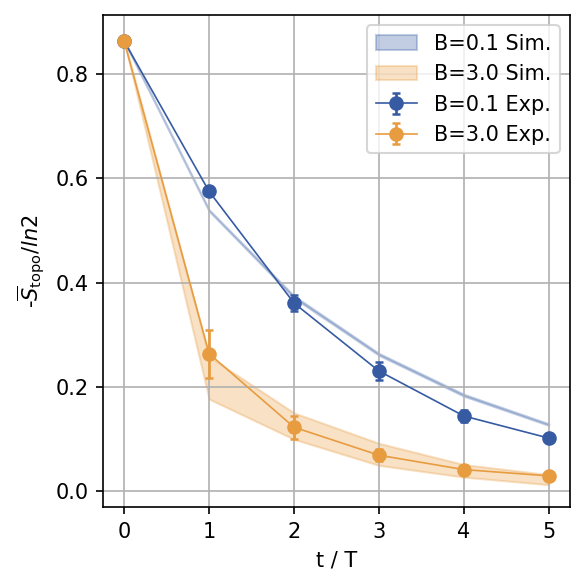

In [27]:
plt.figure(figsize=(4, 4), dpi=150)
disorders = [0.1, 3.0]
for j, disorder in enumerate(disorders):
    plt.errorbar(
        ts,
        S_topo_exp_avg[j],
        S_topo_exp_err[j],
        marker="o",
        color=["#365ba3", "#e89c40"][j],
        elinewidth=1.3,
        linewidth=0.8,
        capsize=1.8,
        capthick=1.2,
        label=f"B={disorder} Exp.",
    )

    plt.fill_between(
        ts,
        S_topo_sim_avg[j] - S_topo_sim_err[j],
        S_topo_sim_avg[j] + S_topo_sim_err[j],
        label=f"B={disorder} Sim.",
        color=["#365ba3", "#e89c40"][j],
        alpha=0.3,
    )
plt.ylabel(r"-$\overline{S}_{\rm topo}/ln2$")
plt.xlabel("t / T")
plt.tight_layout()
plt.grid(True)
plt.legend()

# Fig4.D

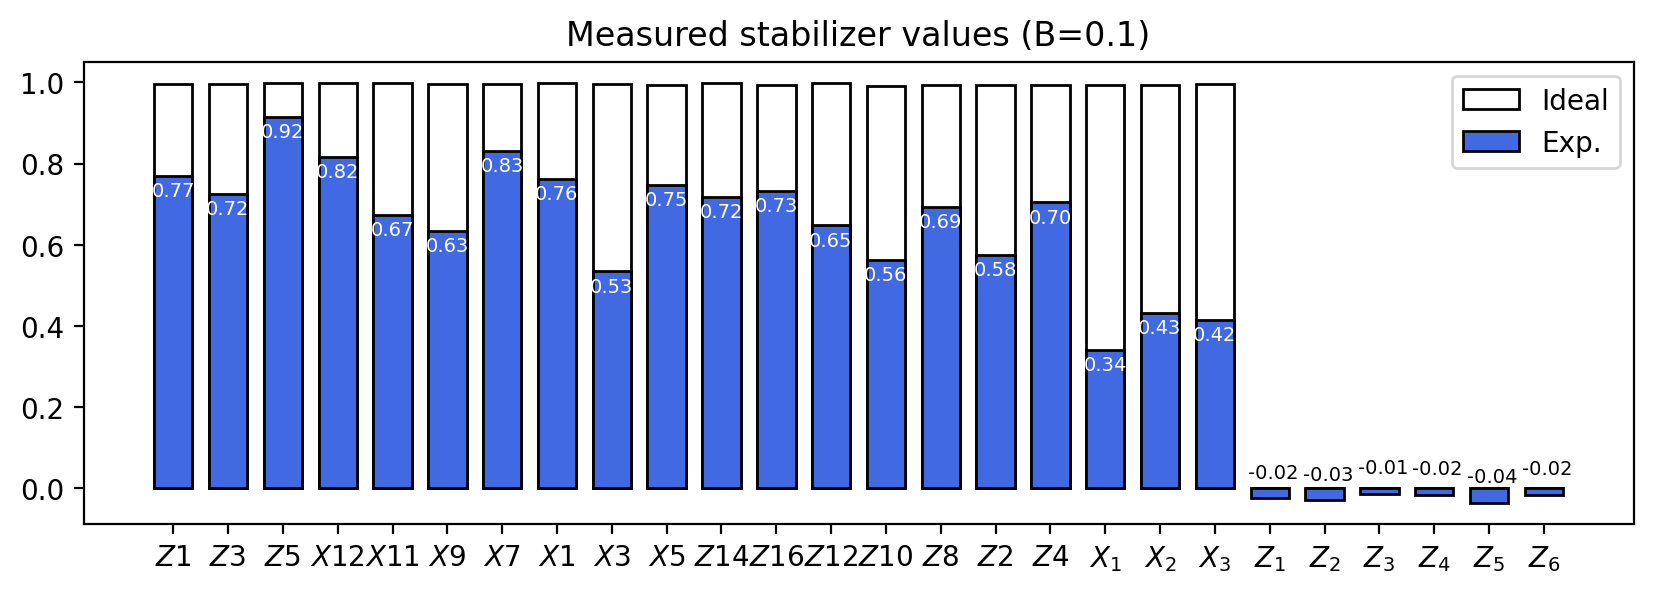

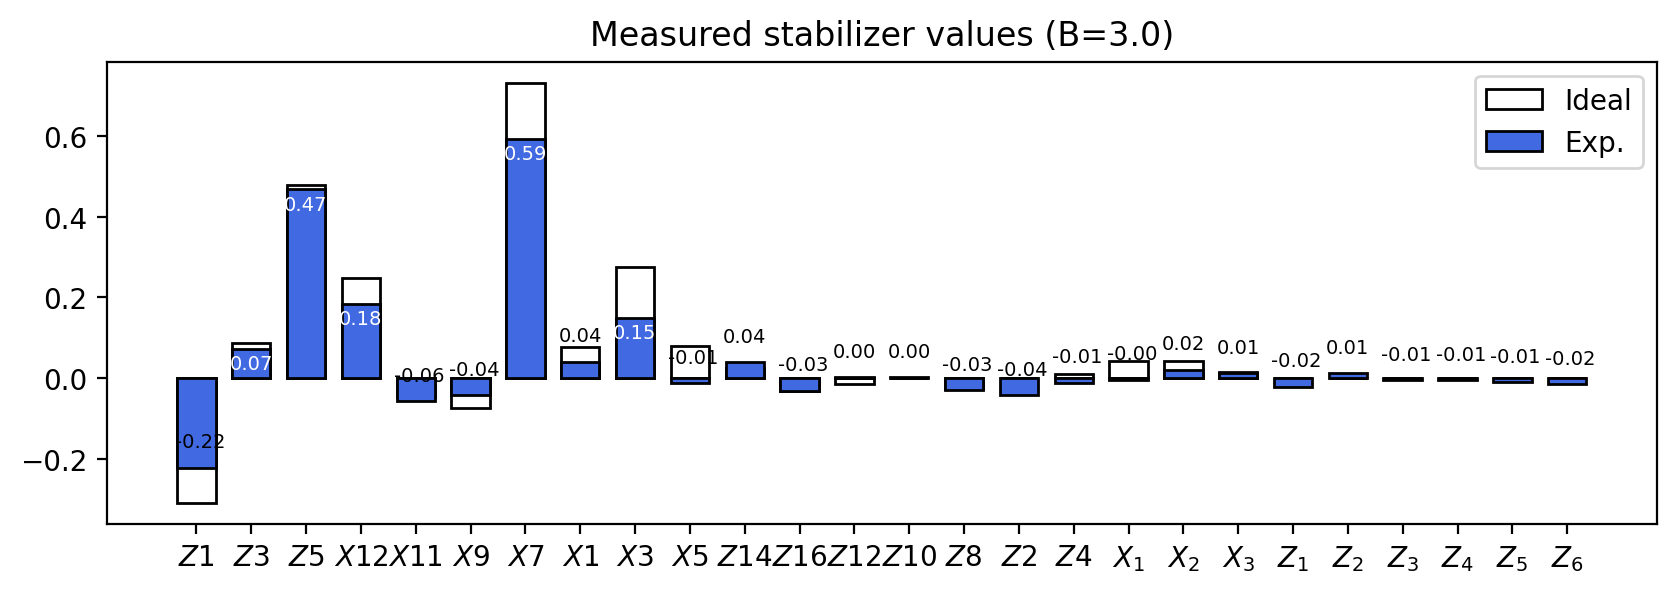

In [28]:
fig3a_data = scipy.io.loadmat("fig4d.mat", simplify_cells=True)
meas_ops = fig3a_data["0.1"]["meas_ops"]
xs = np.arange(len(meas_ops))
sim_values = fig3a_data["0.1"]["sim_values"]
exp_values = fig3a_data["0.1"]["exp_values"]

plt.figure(figsize=(10, 3), dpi=200)
plt.bar(xs, sim_values, width=0.7, ec="k", fc="none", label="Ideal")
plt.bar(xs, exp_values, width=0.7, ec="k", fc="royalblue", label="Exp.")
for x, y in zip(xs, exp_values.tolist()):
    if y > 0.05:
        plt.text(x - 0.4, y - 0.05, "{:.2f}".format(y), fontsize=7, color="w")
    else:
        plt.text(x - 0.4, y + 0.05, "{:.2f}".format(y), fontsize=7, color="k")

plt.xticks(xs, [r"$" + ss.replace(" ", "") + r"$" for ss in fig3a_data["0.1"]["meas_ops"]])
plt.title("Measured stabilizer values (B=0.1)")
plt.legend(loc="best")


meas_ops = fig3a_data["3.0"]["meas_ops"]
xs = np.arange(len(meas_ops))
sim_values = fig3a_data["3.0"]["sim_values"]
exp_values = fig3a_data["3.0"]["exp_values"]

plt.figure(figsize=(10, 3), dpi=200)
plt.bar(xs, sim_values, width=0.7, ec="k", fc="none", label="Ideal")
plt.bar(xs, exp_values, width=0.7, ec="k", fc="royalblue", label="Exp.")
for x, y in zip(xs, exp_values.tolist()):
    if y > 0.05:
        plt.text(x - 0.4, y - 0.05, "{:.2f}".format(y), fontsize=7, color="w")
    else:
        plt.text(x - 0.4, y + 0.05, "{:.2f}".format(y), fontsize=7, color="k")

plt.xticks(xs, [r"$" + ss.replace(" ", "") + r"$" for ss in meas_ops])
plt.title("Measured stabilizer values (B=3.0)")
plt.legend(loc="best")

# Fig4.E

In [29]:
fig4e_data = scipy.io.loadmat("fig4e.mat", simplify_cells=True)
disorders = fig4e_data["disorders"]
S_topo_exp_avg = fig4e_data["S_topo_exp_avg"]
S_topo_exp_err = fig4e_data["S_topo_exp_err"]
S_topo_sim_avg = fig4e_data["S_topo_sim_avg"]
S_topo_sim_err = fig4e_data["S_topo_sim_err"]

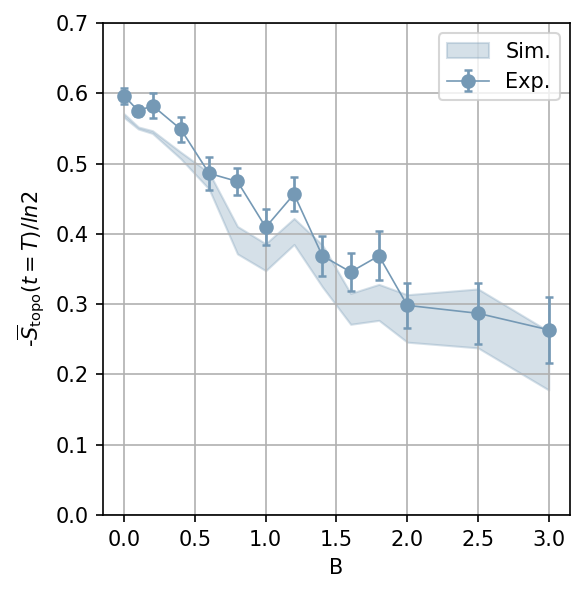

In [30]:
plt.figure(figsize=(4, 4), dpi=150)
plt.errorbar(
    disorders,
    S_topo_exp_avg,
    S_topo_exp_err,
    marker="o",
    color="#7599b5",
    elinewidth=1.3,
    linewidth=0.8,
    capsize=1.8,
    capthick=1.2,
    label="Exp.",
)


plt.fill_between(
    disorders,
    S_topo_sim_avg - S_topo_sim_err,
    S_topo_sim_avg + S_topo_sim_err,
    label=f"Sim.",
    color="#7599b5",
    alpha=0.3,
)

plt.ylabel(r"-$\overline{S}_{\rm topo}(t=T)/ln2$")
plt.xlabel("B")
plt.tight_layout()
plt.ylim([0, 0.7])
plt.grid(True)
plt.legend()